In [1]:
import pandas as pd
import numpy as np
import statistics
import math
import re
import os
import string
import spacy
from spacy.lang.en import English

import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path

In [ ]:
def parse_files(path):
    count =0
    X = []
    y = []
    z=[]
    for dirname, _, filenames in os.walk(path):
      for filename in filenames:
          print(os.path.join(dirname, filename))
    input_dir = Path("/content/Text_dataset")
    categories = [x.name for x in input_dir.iterdir() if x.is_dir()]


    for category in categories:
      for filepath in (input_dir / category).iterdir():
          if filepath.is_file():
            y.append(category)
            X.append(open(filepath, encoding="utf8", errors='ignore').read())
    s= np.array(list(zip(X, y)))

    return pd.DataFrame(s,columns=['text','category'])



In [ ]:
path = 'Text_dataset/raw'
df = pd.read_csv('finaly1.csv')
df = df.loc[ : ,['text','category']]
df.head()

,text,category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


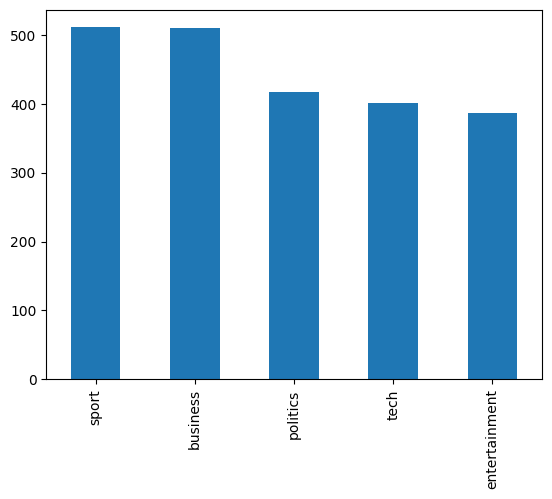

In [ ]:
counts = df['category'].value_counts()
counts.plot(kind='bar')
plt.show()

In [ ]:
def Amar_dataset(df, split_char=' '):
    categories = df['category'].unique()

    all_lengths = []
    per_category = {
        'lengths': {c:[] for c in categories},
        'mean': {c:0 for c in categories},
        'stdev': {c:0 for c in categories}
    }

    for index, row in df.iterrows():
        text = row['text']
        text = re.sub(r"\s+", ' ', text) # Normalize
        text = text.split(split_char)
        l = len(text)

        category = row['category']

        all_lengths.append(l)
        per_category['lengths'][category].append(l)

    for c in categories:
        per_category['mean'][c] = statistics.mean(per_category['lengths'][c])
        per_category['stdev'][c] = statistics.stdev(per_category['lengths'][c])

    global_stats = {
        'mean': statistics.mean(all_lengths),
        'stdev': statistics.stdev(all_lengths),
        'lengths': all_lengths
    }

    return {
        'global': global_stats,
        'per_category': pd.DataFrame(per_category)
    }

def Hist_of_statas(df_stats, n_cols=3):
    categories = df['category'].unique()
    n_rows = math.ceil(len(categories) / n_cols)
    plt.figure(figsize=(15, 8))
    plt.suptitle('Distribution of lengths')
    # Subplot of all lengths
    plt.subplot(n_rows, n_cols, 1)
    plt.title('All categories')
    lengths = df_stats['global']['lengths']
    plt.hist(lengths, color='r')
    # Subplot of each category
    index_subplot = 2
    for c in categories:
        plt.subplot(n_rows, n_cols, index_subplot)
        plt.title('Category: %s' % c)

        lengths = df_stats['per_category']['lengths'][c]
        plt.hist(lengths, color='b')

        index_subplot += 1

    plt.show()

In [ ]:
df_stats = {}
df_stats['initial'] = Amar_dataset(df)
df_stats['initial']['per_category']

,lengths,mean,stdev
business,"[422, 385, 265, 407, 266, 185, 285, 322, 230, ...",329.880392,135.919077
entertainment,"[191, 254, 193, 215, 180, 229, 360, 303, 336, ...",331.621762,261.795254
politics,"[451, 380, 524, 253, 505, 348, 515, 537, 531, ...",454.973621,300.120275
sport,"[212, 145, 378, 196, 162, 147, 126, 236, 388, ...",330.262231,187.963267
tech,"[673, 384, 213, 465, 805, 630, 279, 285, 1235,...",503.695761,239.849176


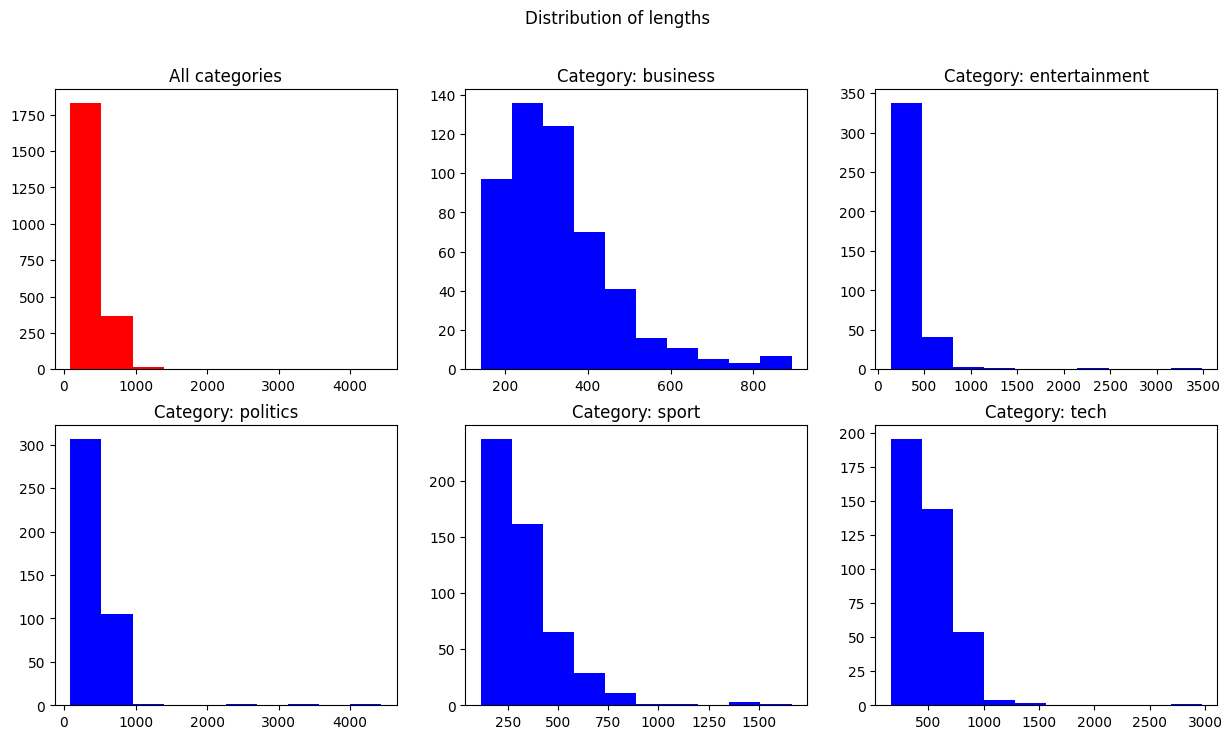

In [ ]:
Hist_of_statas(df_stats['initial'])

In [ ]:
df.head()

,text,category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
def clean_puns(df):
    for index, row in df.iterrows():
        text = row['text']
        ########################################
        ######### YOUR CODES GO HERE ###########
        text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

        # replace all consecutive whitespaces with a single space
        text = re.sub('\s+', ' ', text)
        ########################################
        row['text'] = text

    return df

In [ ]:
df = clean_puns(df)
df.head()

,text,category
0,Ad sales boost Time Warner profit Quarterly pr...,business
1,Dollar gains on Greenspan speech The dollar ha...,business
2,Yukos unit buyer faces loan claim The owners o...,business
3,High fuel prices hit BA s profits British Airw...,business
4,Pernod takeover talk lifts Domecq Shares in UK...,business


In [ ]:
df_stats['char_cleaner'] = Amar_dataset(df)
df_stats['char_cleaner']['per_category']

,lengths,mean,stdev
business,"[442, 399, 272, 424, 279, 191, 292, 330, 238, ...",339.323529,138.047525
entertainment,"[194, 262, 199, 230, 190, 237, 368, 303, 340, ...",340.958549,267.569471
politics,"[460, 394, 532, 255, 516, 352, 528, 544, 556, ...",462.544365,305.206438
sport,"[222, 157, 397, 197, 185, 154, 134, 239, 416, ...",342.142857,193.835379
tech,"[676, 389, 226, 471, 820, 650, 280, 301, 1251,...",514.276808,243.082642


In [ ]:
def lemmatize_dataset(df, join_char=' '):
    nlp = spacy.load("en_core_web_sm")
    for index, row in df.iterrows():
        text = row['text']
        tokens = nlp(text)
        text = [ w.lemma_.strip().lower() if w.lemma_ != "-PRON-" else w.lower_ for w in tokens ]
        row['text'] = join_char.join(text)

    return df

In [ ]:
df = lemmatize_dataset(df)
df.head() # Sample

,text,category
0,ad sale boost time warner profit quarterly pro...,business
1,dollar gain on greenspan speech the dollar hav...,business
2,yukos unit buyer face loan claim the owner of ...,business
3,high fuel price hit ba s profit british airway...,business
4,pernod takeover talk lift domecq share in uk d...,business


In [ ]:
df_stats['lematization'] = Amar_dataset(df)
df_stats['lematization']['per_category']

,lengths,mean,stdev
business,"[446, 398, 274, 430, 278, 190, 291, 329, 237, ...",339.354902,138.066844
entertainment,"[193, 261, 199, 229, 190, 236, 368, 302, 339, ...",341.010363,267.566921
politics,"[459, 393, 532, 254, 515, 353, 527, 543, 555, ...",461.997602,305.497407
sport,"[223, 156, 399, 196, 190, 157, 138, 238, 425, ...",342.033268,194.650136
tech,"[675, 388, 225, 470, 819, 649, 279, 300, 1250,...",513.972569,243.421932


In [ ]:
def clean_stops(df, join_char=' ', split_char=' '):
    stop_words = list(spacy.lang.en.stop_words.STOP_WORDS) + list(string.punctuation)
    nlp = English()
    for i, row in df.iterrows():
        tokens = row['text'].split(split_char)
        tokens = [token for token in tokens if token.lower() not in stop_words]
        cleaned_text = join_char.join(tokens)
        df.at[i, 'text'] = cleaned_text
    return df

In [ ]:
df = clean_stops(df)
df.head()

,text,category
0,ad sale boost time warner profit quarterly pro...,business
1,dollar gain greenspan speech dollar hit high l...,business
2,yukos unit buyer face loan claim owner embattl...,business
3,high fuel price hit ba s profit british airway...,business
4,pernod takeover talk lift domecq share uk drin...,business


In [ ]:
df_stats['stop_words'] = Amar_dataset(df)
df_stats['stop_words']['per_category']

,lengths,mean,stdev
business,"[254, 213, 155, 261, 166, 107, 153, 179, 150, ...",188.370588,71.553996
entertainment,"[105, 160, 116, 132, 119, 144, 210, 172, 181, ...",183.945596,127.965984
politics,"[223, 212, 268, 124, 261, 164, 272, 262, 310, ...",232.148681,138.131772
sport,"[119, 90, 189, 93, 121, 90, 89, 99, 250, 153, ...",174.291585,101.754795
tech,"[343, 207, 125, 204, 414, 335, 148, 170, 614, ...",261.960100,111.657774


In [ ]:
def tf_term(df, split_char=' '):
    tf = []
    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)

        words_freqs = {}
        for w in tokens:
            words_freqs[w] = 1 if w not in words_freqs else (words_freqs[w] + 1)

        max_freq = max(list(words_freqs.values()))
        words_freqs = {w:(abs_freq / max_freq) for w, abs_freq in words_freqs.items()}

        tf.append(words_freqs)

    return tf


def idf_term(df, split_char=' '):
    idf = {}
    n_docs = len(df.index)

    count_usage = {}
    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)

        vocabulary_in_doc = list(set(tokens))
        for w in vocabulary_in_doc:
            if w not in count_usage:
                count_usage[w] = 1
            else:
                count_usage[w] += 1

    for w, count in count_usage.items():
        idf[w] = math.log(n_docs / count)

    return idf


def tf_idf_func(df, split_char=' '):
    tf = tf_term(df, split_char)
    idf = idf_term(df, split_char)

    tf_idf = []
    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)
        vocabulary_in_doc = list(set(tokens))

        row_tf_idf = {}
        for w in vocabulary_in_doc:
            row_tf_idf[w] = tf[index][w] * idf[w]

        tf_idf.append(row_tf_idf)

    return tf_idf

def tf_idf_on_data(df, split_char=' ', join_char=' '):
    all_tf_idf = tf_idf_func(df, split_char)

    for doc_i, doc_tf_idf in enumerate(all_tf_idf):
        doc_tf_idf = {k: v for k, v in sorted(doc_tf_idf.items(), key=lambda item: item[1], reverse=True)}
        doc_tf_idf_values = np.array(list(doc_tf_idf.values()))

        probs = doc_tf_idf_values / sum(doc_tf_idf_values)

        p_value = 0
        for i, p in enumerate(probs):
            if p_value < 0.975:
                p_value += p
            else:
                break

        threshold = doc_tf_idf_values[i]

        row = df.loc[doc_i, :]
        tokens = row['text'].split(split_char)
        i = len(tokens)

        original_tokens = tokens.copy()
        while i >= 0:
            i -= 1

            w = tokens[i]
            if doc_tf_idf[w] < threshold:
                del tokens[i]


        doc_tf_idf = {k: v for k, v in sorted(doc_tf_idf.items(), key=lambda item: item[1])}
        row['text'] = join_char.join(tokens)

    return df

In [ ]:
df = tf_idf_on_data(df)
df.head() # Sample

,text,category
0,ad sale boost time warner profit quarterly pro...,business
1,dollar gain greenspan speech dollar hit level ...,business
2,yukos unit buyer face loan claim owner embattl...,business
3,high fuel price hit ba profit british airways ...,business
4,pernod takeover talk lift domecq share drink f...,business


In [ ]:
df_stats['tf_idf'] = Amar_dataset(df)
df_stats['tf_idf']['per_category']

,lengths,mean,stdev
business,"[238, 193, 147, 242, 150, 99, 142, 164, 139, 1...",174.507843,66.248675
entertainment,"[95, 144, 104, 113, 106, 131, 191, 162, 167, 1...",169.297927,120.295035
politics,"[209, 200, 252, 115, 244, 154, 252, 244, 286, ...",216.419664,129.989659
sport,"[112, 82, 174, 87, 107, 83, 83, 93, 225, 143, ...",160.878669,94.412159
tech,"[321, 196, 117, 190, 384, 311, 139, 160, 567, ...",245.062344,104.897229


In [ ]:
path = '/content/data.csv'
df.to_csv(path, index_label=False)

In [ ]:
import pickle
import seaborn as sns

from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
def get_cats(df):
    return df['category'].unique()

In [ ]:
## provide your path

df = pd.read_csv('data.csv')
df.head()

,text,category
0,ad sale boost time warner profit quarterly pro...,business
1,dollar gain greenspan speech dollar hit level ...,business
2,yukos unit buyer face loan claim owner embattl...,business
3,high fuel price hit ba profit british airways ...,business
4,pernod takeover talk lift domecq share drink f...,business


In [ ]:
X_data = df[['text']].to_numpy().reshape(-1)
Y_data = df[['category']].to_numpy().reshape(-1)

In [ ]:
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

n_categories = len(get_cats(df))
print('Number of categories: %d' % n_categories)

print('Loading train dataset...')

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
print('Done!')

Texts in dataset: 2225
Number of categories: 5
Loading train dataset...
Done!


In [ ]:

params = {
    'clf__loss': ['hinge', 'log', 'modified_huber'],
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
}

# Define the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', SGDClassifier()),
])

# Define the grid search with cross-validation
grid_search = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, verbose=1)

# Fit the data
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\rfi\anaconda4\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__loss': ['hinge', 'log', 'modified_huber'],
                         'clf__penalty': ['l1', 'l2']},
             verbose=1)

In [ ]:
print('Best parameters set:')
print(grid_search.best_params_)

Best parameters set:
{'clf__alpha': 0.01, 'clf__loss': 'log', 'clf__penalty': 'l2'}


In [ ]:
def confusion_matrix_ploting(X_test, Y_test, model):
    Y_pred = model.predict(X_test)

    con_mat = confusion_matrix(Y_test, Y_pred)
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

    label_names = list(range(len(con_mat_norm)))
    con_mat_df = pd.DataFrame(con_mat_norm,
                              index=label_names,
                              columns=label_names)

    figure = plt.figure(figsize=(10, 10))
    sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
Y_pred = grid_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.4f' % accuracy)

# Compute the classification report
report = classification_report(Y_test, Y_pred)
print('Classification report:')
print(report)


Accuracy: 0.9660
Classification report:
               precision    recall  f1-score   support

     business       0.96      0.95      0.95       185
entertainment       0.97      0.97      0.97       129
     politics       0.96      0.94      0.95       131
        sport       0.96      0.99      0.98       155
         tech       0.99      0.98      0.98       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



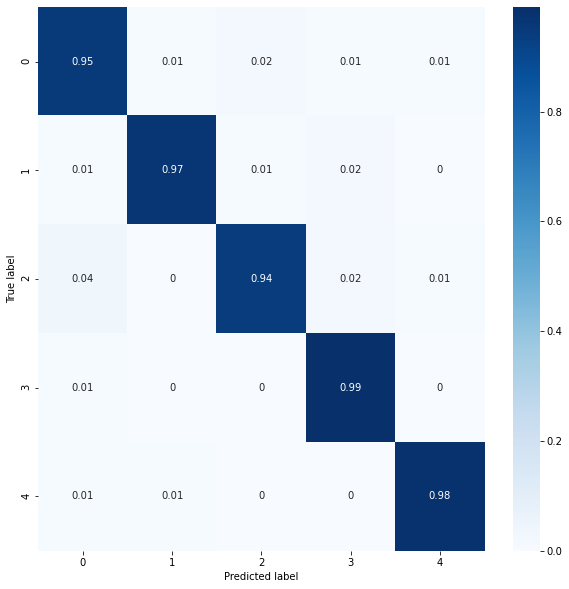

In [ ]:
## run the below cell and see your model's performance

confusion_matrix_ploting(X_test, Y_test, grid_search)

In [ ]:
params = {
    'clf__C': [0.1, 1.0, 10.0],   # regularization strengths
    'clf__penalty': ['l1', 'l2'],  # penalties
    'clf__solver': ['liblinear'],  # solvers for logistic regression
    'vect__strip_accents': [None],  # remove accents
    'vect__lowercase': [False]     # disable lowercase
}

# Set up the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
])

# Set up the grid search
grid_search = GridSearchCV(pipeline, params, cv=10, n_jobs=-1)

# Fit the data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['liblinear'],
                         'vect__lowercase': [False],
                         'vect__strip_accents': [None]})

In [ ]:
print('Best parameters set:')
print(grid_search.best_params_)

Best parameters set:
{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'vect__lowercase': False, 'vect__strip_accents': None}


In [ ]:
Y_pred = grid_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.4f' % accuracy)

# Compute the classification report
report = classification_report(Y_test, Y_pred)
print('Classification report:')
print(report)

Accuracy: 0.9687
Classification report:
               precision    recall  f1-score   support

     business       0.95      0.96      0.95       185
entertainment       0.97      0.97      0.97       129
     politics       0.95      0.96      0.96       131
        sport       0.98      0.99      0.99       155
         tech       0.99      0.96      0.98       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



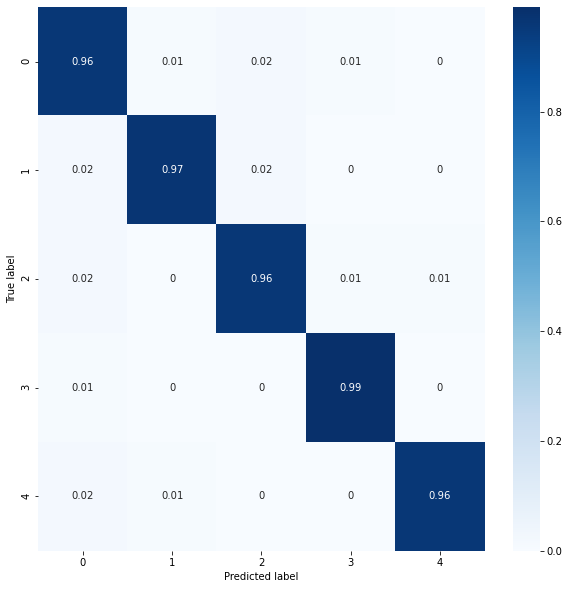

In [ ]:
## run the below cell and see your model's performance

confusion_matrix_ploting(X_test, Y_test, grid_search)

In [ ]:
params = {
    'clf__C': [0.1, 1.0, 10.0],     # regularization strengths
    'clf__kernel': ['linear', 'rbf'],  # kernel functions
    'clf__gamma': ['scale', 'auto'],  # kernel coefficients
    'vect__strip_accents': [None],    # remove accents
    'vect__lowercase': [False]       # disable lowercase
}

# Set up the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC())
])

# Set up the grid search
grid_search = GridSearchCV(pipeline, params, cv=10, n_jobs=-1)

# Fit the data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'rbf'],
                         'vect__lowercase': [False],
                         'vect__strip_accents': [None]})

In [ ]:
print('Best parameters set:')
print(grid_search.best_params_)

Best parameters set:
{'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear', 'vect__lowercase': False, 'vect__strip_accents': None}


In [ ]:
Y_pred = grid_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.4f' % accuracy)

# Compute the classification report
report = classification_report(Y_test, Y_pred)
print('Classification report:')
print(report)

Accuracy: 0.9687
Classification report:
               precision    recall  f1-score   support

     business       0.96      0.95      0.95       185
entertainment       0.96      0.98      0.97       129
     politics       0.97      0.96      0.97       131
        sport       0.97      1.00      0.99       155
         tech       0.98      0.96      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



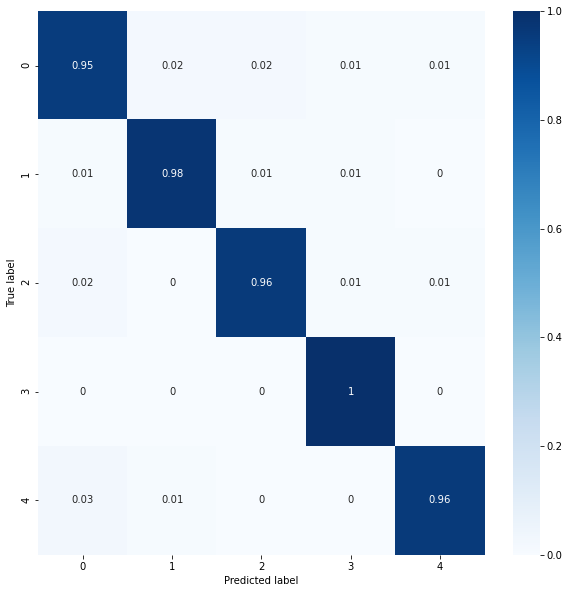

In [ ]:
## run the below cell and see your model's performance

confusion_matrix_ploting(X_test, Y_test, grid_search)